The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
20/20 [==============================] - 0s 577us/step
Hour 0 fitted
20/20 [==============================] - 0s 474us/step
Hour 1 fitted
20/20 [==============================] - 0s 0s/step
Hour 2 fitted
20/20 [==============================] - 0s 822us/step
Hour 3 fitted
20/20 [==============================] - 0s 585us/step
Hour 4 fitted
20/20 [==============================] - 0s 610us/step
Hour 5 fitted
20/20 [==============================] - 0s 650us/step
Hour 6 fitted
20/20 [==============================] - 0s 0s/step
Hour 7 fitted
20/20 [==============================] - 0s 561us/step
Hour 8 fitted
20/20 [==============================] - 0s 1ms/step
Hour 9 fitted
20/20 [==============================] - 0s 0s/step
Hour 10 fitted
20/20 [==============================] - 0s 444us/step
Hour 11 fitted
20/20 [==============================] - 0s 913us/step
Hour 12 fitted
20/20 [================

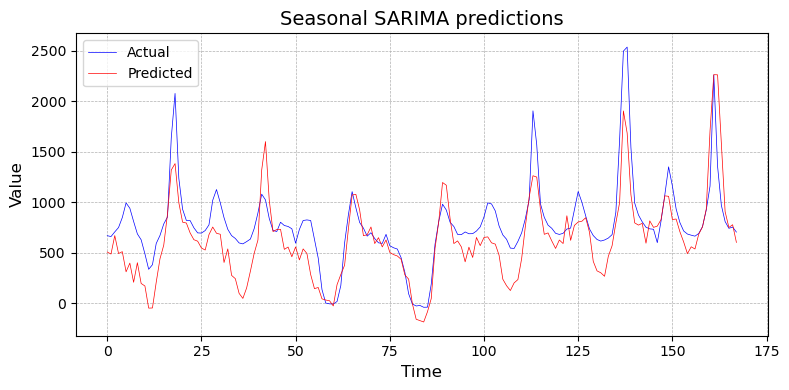

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from functions import *

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import warnings
from sklearn.exceptions import ConvergenceWarning

%load_ext autoreload
%autoreload 2

lags = 7

# Load each
datasets = {}
for hour in range(24):
    df = pd.read_csv(f"Splits/dataset_hour_{hour}.csv")
    datasets[hour] = deseasonalize(df, "both")
    for i in range(1, lags + 1):
        datasets[hour][f'DK1_spot_lag_{i}'] = datasets[hour]['deseasonalized'].shift(i)
        datasets[hour] = datasets[hour].dropna()

regex_choice = "^(sun_|wind_|temp_|DK1_spot_lag_|generation)"
pca_percent = 0.7

y_train, y_test, y_train_deseason, y_test_deseason, y_train_season, y_test_season, \
exog_variables_train, scalers, exog_variables_train_stand, exog_variables_test, \
exog_variables_test_stand, pca_train, pca_test = split_data_into_series(datasets, pca_percent, regex_choice)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

predictions_dict = {}
for hour in range(24):
    # Define neural network architecture
    model = Sequential([
        Dense(100, activation='linear', input_dim=exog_variables_train_stand[0].shape[1]),
        Dense(50, activation='linear'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Fit model
    model.fit(exog_variables_train_stand[hour], y_train_deseason[hour], epochs=100, batch_size=32, verbose=0)

    # Predict on the test set
    predictions_dict[hour] = model.predict(exog_variables_test_stand[hour]).reshape(-1, 1) + y_test_season[hour].reshape(-1, 1)

    print(f'Hour {hour} fitted')

warnings.resetwarnings()

combined_predictions, combined_test = combine_24_hour_data(predictions_dict, y_test)

smape_baseline = out_of_sample_pred(combined_test, combined_predictions)

print(f'SMAPE baseline (24 lags) out of sample prediction: {smape_baseline}')

plot_actual_vs_predicted(combined_test, combined_predictions, "Seasonal SARIMA predictions")


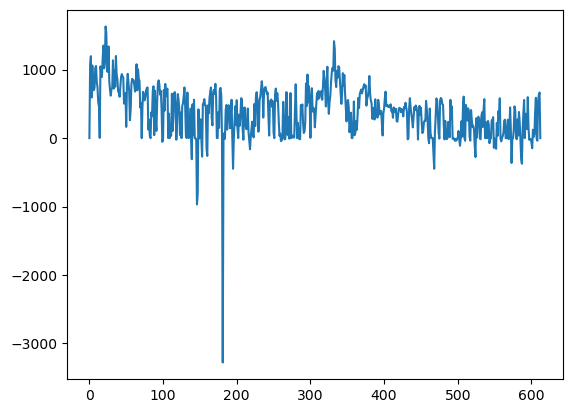

In [34]:
plt.plot(y_test[12])

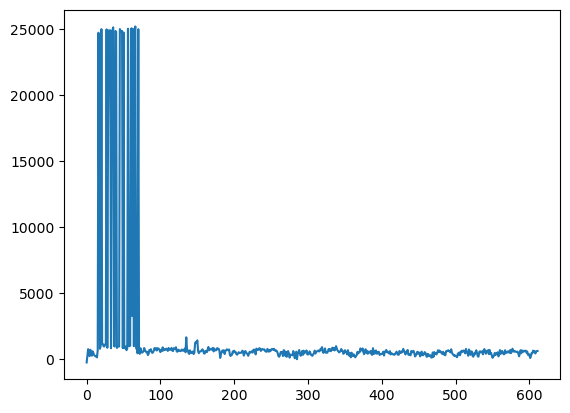

In [45]:
plt.plot(predictions_dict[23])

In [3]:
predictions_dict[0]

array([[ 4.75889451e+01],
       [-3.26908078e+02],
       [ 1.01365440e+02],
       [ 3.12664948e+02],
       [ 2.60430295e+02],
       [ 3.32363258e+02],
       [ 4.25786957e+02],
       [ 2.31859941e+02],
       [ 2.81939089e+02],
       [ 4.02632286e+02],
       [ 3.82023774e+02],
       [ 2.13926267e+02],
       [ 1.95786475e+02],
       [-3.82358851e+01],
       [ 1.25978685e+02],
       [ 2.40646998e+01],
       [ 2.02612877e+02],
       [-1.28266777e+05],
       [-1.28153862e+05],
       [-7.63480806e+04],
       [ 7.24766999e+02],
       [-1.28056167e+05],
       [ 1.00411423e+03],
       [ 1.11777453e+03],
       [ 9.04178727e+02],
       [ 9.75435453e+02],
       [ 1.12592982e+03],
       [ 1.04199138e+03],
       [-2.46016357e+04],
       [-1.28181079e+05],
       [ 2.38224480e+02],
       [-1.28226011e+05],
       [-8.93116351e+04],
       [ 6.47723659e+02],
       [ 5.40403396e+02],
       [-1.28373753e+05],
       [ 7.32602387e+02],
       [ 8.87864386e+02],
       [ 9.3